### 루브릭

아래의 기준을 바탕으로 프로젝트를 평가합니다.

평가문항	
- 1. 시계열의 안정성이 충분히 확인되었는가?
    - 플로팅과 adfuller 메소드가 모두 적절히 사용되었음

- 2. ARIMA 모델 모수선택 근거를 체계적으로 제시하였는가?
    - p,q를 위한 ACF, PACF 사용과 d를 위한 차분 과정이 명확히 제시됨

- 3. 예측 모델의 오차율이 기준 이하로 정확하게 나왔는가?
    - 3개 이상 종목이 MAPE 10% 미만의 정확도로 예측됨

### 시계열 예측
- 가격변동성이 큰 비트코인은 어떻게 예측할까 ?

### STEP 1 : 시계열 데이터 준비


In [11]:
!pip install statsmodels

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Time Series 생성

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/BTC-USD.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
Name: Close, dtype: float64

In [6]:
ts.shape

(2352,)

### STEP 2 : 각종 전처리 수행

In [7]:
# 결측치 처리
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력
# 결측치 없음

Series([], Name: Close, dtype: float64)

In [9]:
# 로그 변환을 통한 시계열 가공 
ts_log = np.log(ts)
ts_log.head()

Date
2014-09-17    6.125414
2014-09-18    6.050771
2014-09-19    5.978369
2014-09-20    6.013480
2014-09-21    5.988513
Name: Close, dtype: float64

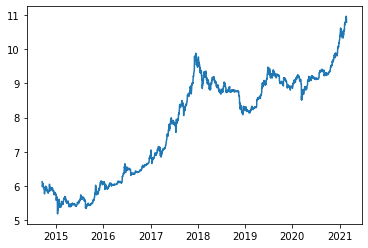

In [13]:
plt.plot(ts_log);

### 함수선언 및 라이브러리 불러오기


In [19]:
from statsmodels.tsa.stattools import adfuller

def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

### STEP 3 : 시계열 안정성 분석

- 귀무가설 : 비트코인의 시계열 데이터는 안정적이지 않다
- 대립가설 : 비트코인의 시계열 데이터는 안정적이다.
- 유의수준은 0.05로 설정

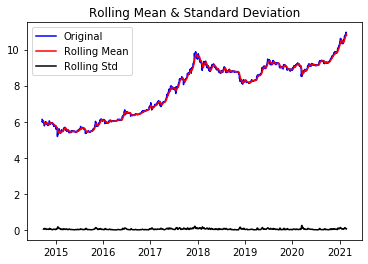

Results of Dickey-Fuller Test:
Test Statistic                    0.269732
p-value                           0.975912
#Lags Used                       10.000000
Number of Observations Used    2341.000000
Critical Value (1%)              -3.433146
Critical Value (5%)              -2.862775
Critical Value (10%)             -2.567428
dtype: float64


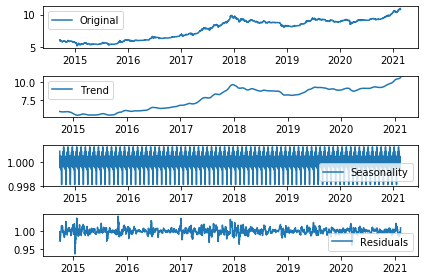

In [20]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

- p-value 가 0.97 이므로 유의수준인 0.05보다 크다
- 따라서 귀무가설인 '비트코인의 시계열 데이터는 안정적이지 않다'는 기각 할 수 없다

In [22]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

NameError: name 'ts_log_moving_avg' is not defined

### STEP 4 : 학습, 테스트 데이터셋 생성

### STEP 5 : 적정 ARIMA 모수 찾기

### STEP 6 : ARIMA 모델 훈련과 테스트

### 회고